In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
batch_size = 256       #设置批量大小
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)     #读取训练集和测试集

一、初始化模型参数

In [3]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256     #输入，输出和隐藏层个数分别为784，10，256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)        
#w1的行数和列数分别是输入个数*隐藏层个数，乘0.01我的理解：randn是正态(0,1)分布，乘0.01使得分布为正态(0,0.1)分布，数据方差更小
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))     #b1是长度为隐藏层个数的列向量，设置为0
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

二、激活函数：实现ReLU激活函数

In [4]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

三、模型

In [5]:
def net(X):
    X = X.reshape((-1, num_inputs))     #-1表示自动计算0维的个数，这里=batch_size=256
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

四、 损失函数

In [6]:
loss = nn.CrossEntropyLoss(reduction='none')

五、训练：多层感知机的训练过程与softmax回归的训练过程完全相同

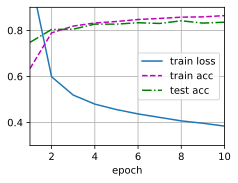

In [7]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

多层感知机训练结果与softmax回归训练结果比较：多层感知机损失降低，训练精度和测试精度与softmax回归差不多

六、测试

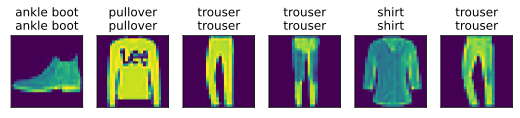

In [8]:
d2l.predict_ch3(net, test_iter)